In [ ]:
# https://albumentations.ai/docs/getting_started/image_augmentation/

# https://albumentations-demo.herokuapp.com/

# https://albumentations.ai/docs/examples/example_keypoints/
# https://albumentations.ai/docs/getting_started/keypoints_augmentation/

In [273]:
%pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [274]:
import numpy as np
import albumentations as A
import cv2
import matplotlib.pyplot as plt

from utils import ThousandLandmarksDataset
from utils import ScaleMinSideToSize, CropCenter, TransformByKeys, TransformByKeysA
from torchvision import transforms # можно использовать albumentations.Compose или torchvision.transforms.Compose

EXAMPLE = "data/train/images/a69558e1479aac67ba96809e31202507.jpg"

In [74]:
transform = A.Compose([
    
    # пиксельные трансформации
    A.RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
    A.RandomGamma(always_apply=False, p=0.5, gamma_limit=(30, 140), eps=1e-07),
    A.ToGray(always_apply=False, p=0.5),
    
    # шумы
    A.Blur(always_apply=False, p=0.5, blur_limit=(3, 7)),
    A.GaussNoise(always_apply=False, p=0.5, var_limit=(10.0, 50.0)),
    
    # перекрытия
    A.CoarseDropout(always_apply=False, p=0.5, max_holes=2, max_height=30, max_width=30, min_holes=1, min_height=30, min_width=30),
    
    
    # шатания
    
    
])

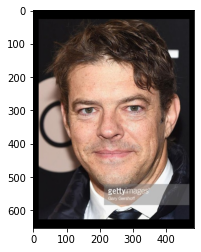

In [219]:
image = cv2.imread(EXAMPLE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
_ = plt.imshow(image)

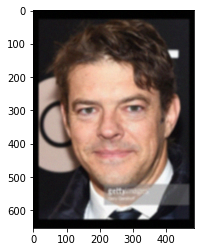

In [215]:
image_transformed = transform(image=image)['image'] # transform will return a dictionary with a single key "image"
_ = plt.imshow(image_transformed)

In [52]:
# в каком виде подаются изображения в модель на трэйне

In [236]:
# отрисовка разметки
def image_with_landmarks(image, landmarks):
    
    ## change color channels
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # эта часть включена в ThousandLandmarksDataset.__getitem__([idx])
    
    # plot landmarks
    for i in range(len(landmarks)):
        x, y = landmarks[i].astype(np.int)
        cv2.circle(image, (x, y), 1, (0, 0, 255), 1, -1) # true landmark blue
        
    return image

In [254]:
train_transforms = transforms.Compose([
        ScaleMinSideToSize((256, 256)),
        CropCenter(256),
        
        # пиксельные трансформации
        TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), ("image",)),
        TransformByKeysA(A.RandomGamma(always_apply=False, p=0.2, gamma_limit=(30, 140), eps=1e-07), ("image",)),
        TransformByKeysA(A.ToGray(always_apply=False, p=0.1), ("image",)),

        # шумы
        TransformByKeysA(A.Blur(always_apply=False, p=0.2, blur_limit=(3, 7)), ("image",)),
        TransformByKeysA(A.GaussNoise(always_apply=False, p=0.2, var_limit=(10.0, 50.0)), ("image",)),

        # перекрытия
        TransformByKeysA(A.CoarseDropout(always_apply=False, p=0.3, max_holes=2, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)), 
        
#         TransformByKeys(transforms.ToPILImage(), ("image",)),
#         TransformByKeys(transforms.ToTensor(), ("image",)),
#         TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
    ]) 

In [255]:
train_dataset = ThousandLandmarksDataset('data/train', train_transforms, split="train", data_size=3, train_share=1)

load landmarks...: 100%|██████████| 3/3 [00:00<00:00, 1832.91it/s]


In [256]:
SAMPLE_N = 0

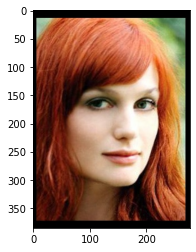

In [257]:
# source_state
image = cv2.imread(train_dataset.image_names[SAMPLE_N])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = image_with_landmarks(image, train_dataset.landmarks[SAMPLE_N].numpy())
_ = plt.imshow(image)

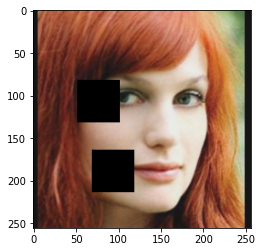

In [272]:
# после трансформаций для задачи
sample = train_dataset.__getitem__(SAMPLE_N)
#image = image_with_landmarks(sample['image'], sample['landmarks'].reshape(-1, 2).numpy())
_ = plt.imshow(sample['image'])

In [277]:
# в каком виде подаются изображения в модель на трэйне или тесте (сетка изображений)

In [ ]:
train_transforms = transforms.Compose([
        ScaleMinSideToSize((256, 256)),
        CropCenter(256),
        
        # пиксельные трансформации
        TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), ("image",)),
        TransformByKeysA(A.RandomGamma(always_apply=False, p=0.2, gamma_limit=(30, 140), eps=1e-07), ("image",)),
        TransformByKeysA(A.ToGray(always_apply=False, p=0.1), ("image",)),

        # шумы
        TransformByKeysA(A.Blur(always_apply=False, p=0.2, blur_limit=(3, 7)), ("image",)),
        TransformByKeysA(A.GaussNoise(always_apply=False, p=0.2, var_limit=(10.0, 50.0)), ("image",)),

        # перекрытия
        TransformByKeysA(A.CoarseDropout(always_apply=False, p=0.3, max_holes=2, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)), 
        
#         TransformByKeys(transforms.ToPILImage(), ("image",)),
#         TransformByKeys(transforms.ToTensor(), ("image",)),
#         TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
    ]) 

In [324]:
test_transforms = transforms.Compose([
        ScaleMinSideToSize((256, 256)),
        CropCenter(256),
#         TransformByKeys(transforms.ToPILImage(), ("image",)),
#         TransformByKeys(transforms.ToTensor(), ("image",)),
#         TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
    ])

In [329]:
test_dataset = ThousandLandmarksDataset('data/test', test_transforms, split="test", data_size=100)
train_dataset = ThousandLandmarksDataset('data/train', test_transforms, split="train", data_size=100, train_share=1)

load landmarks...: 100%|██████████| 100/100 [00:00<00:00, 2625.03it/s]


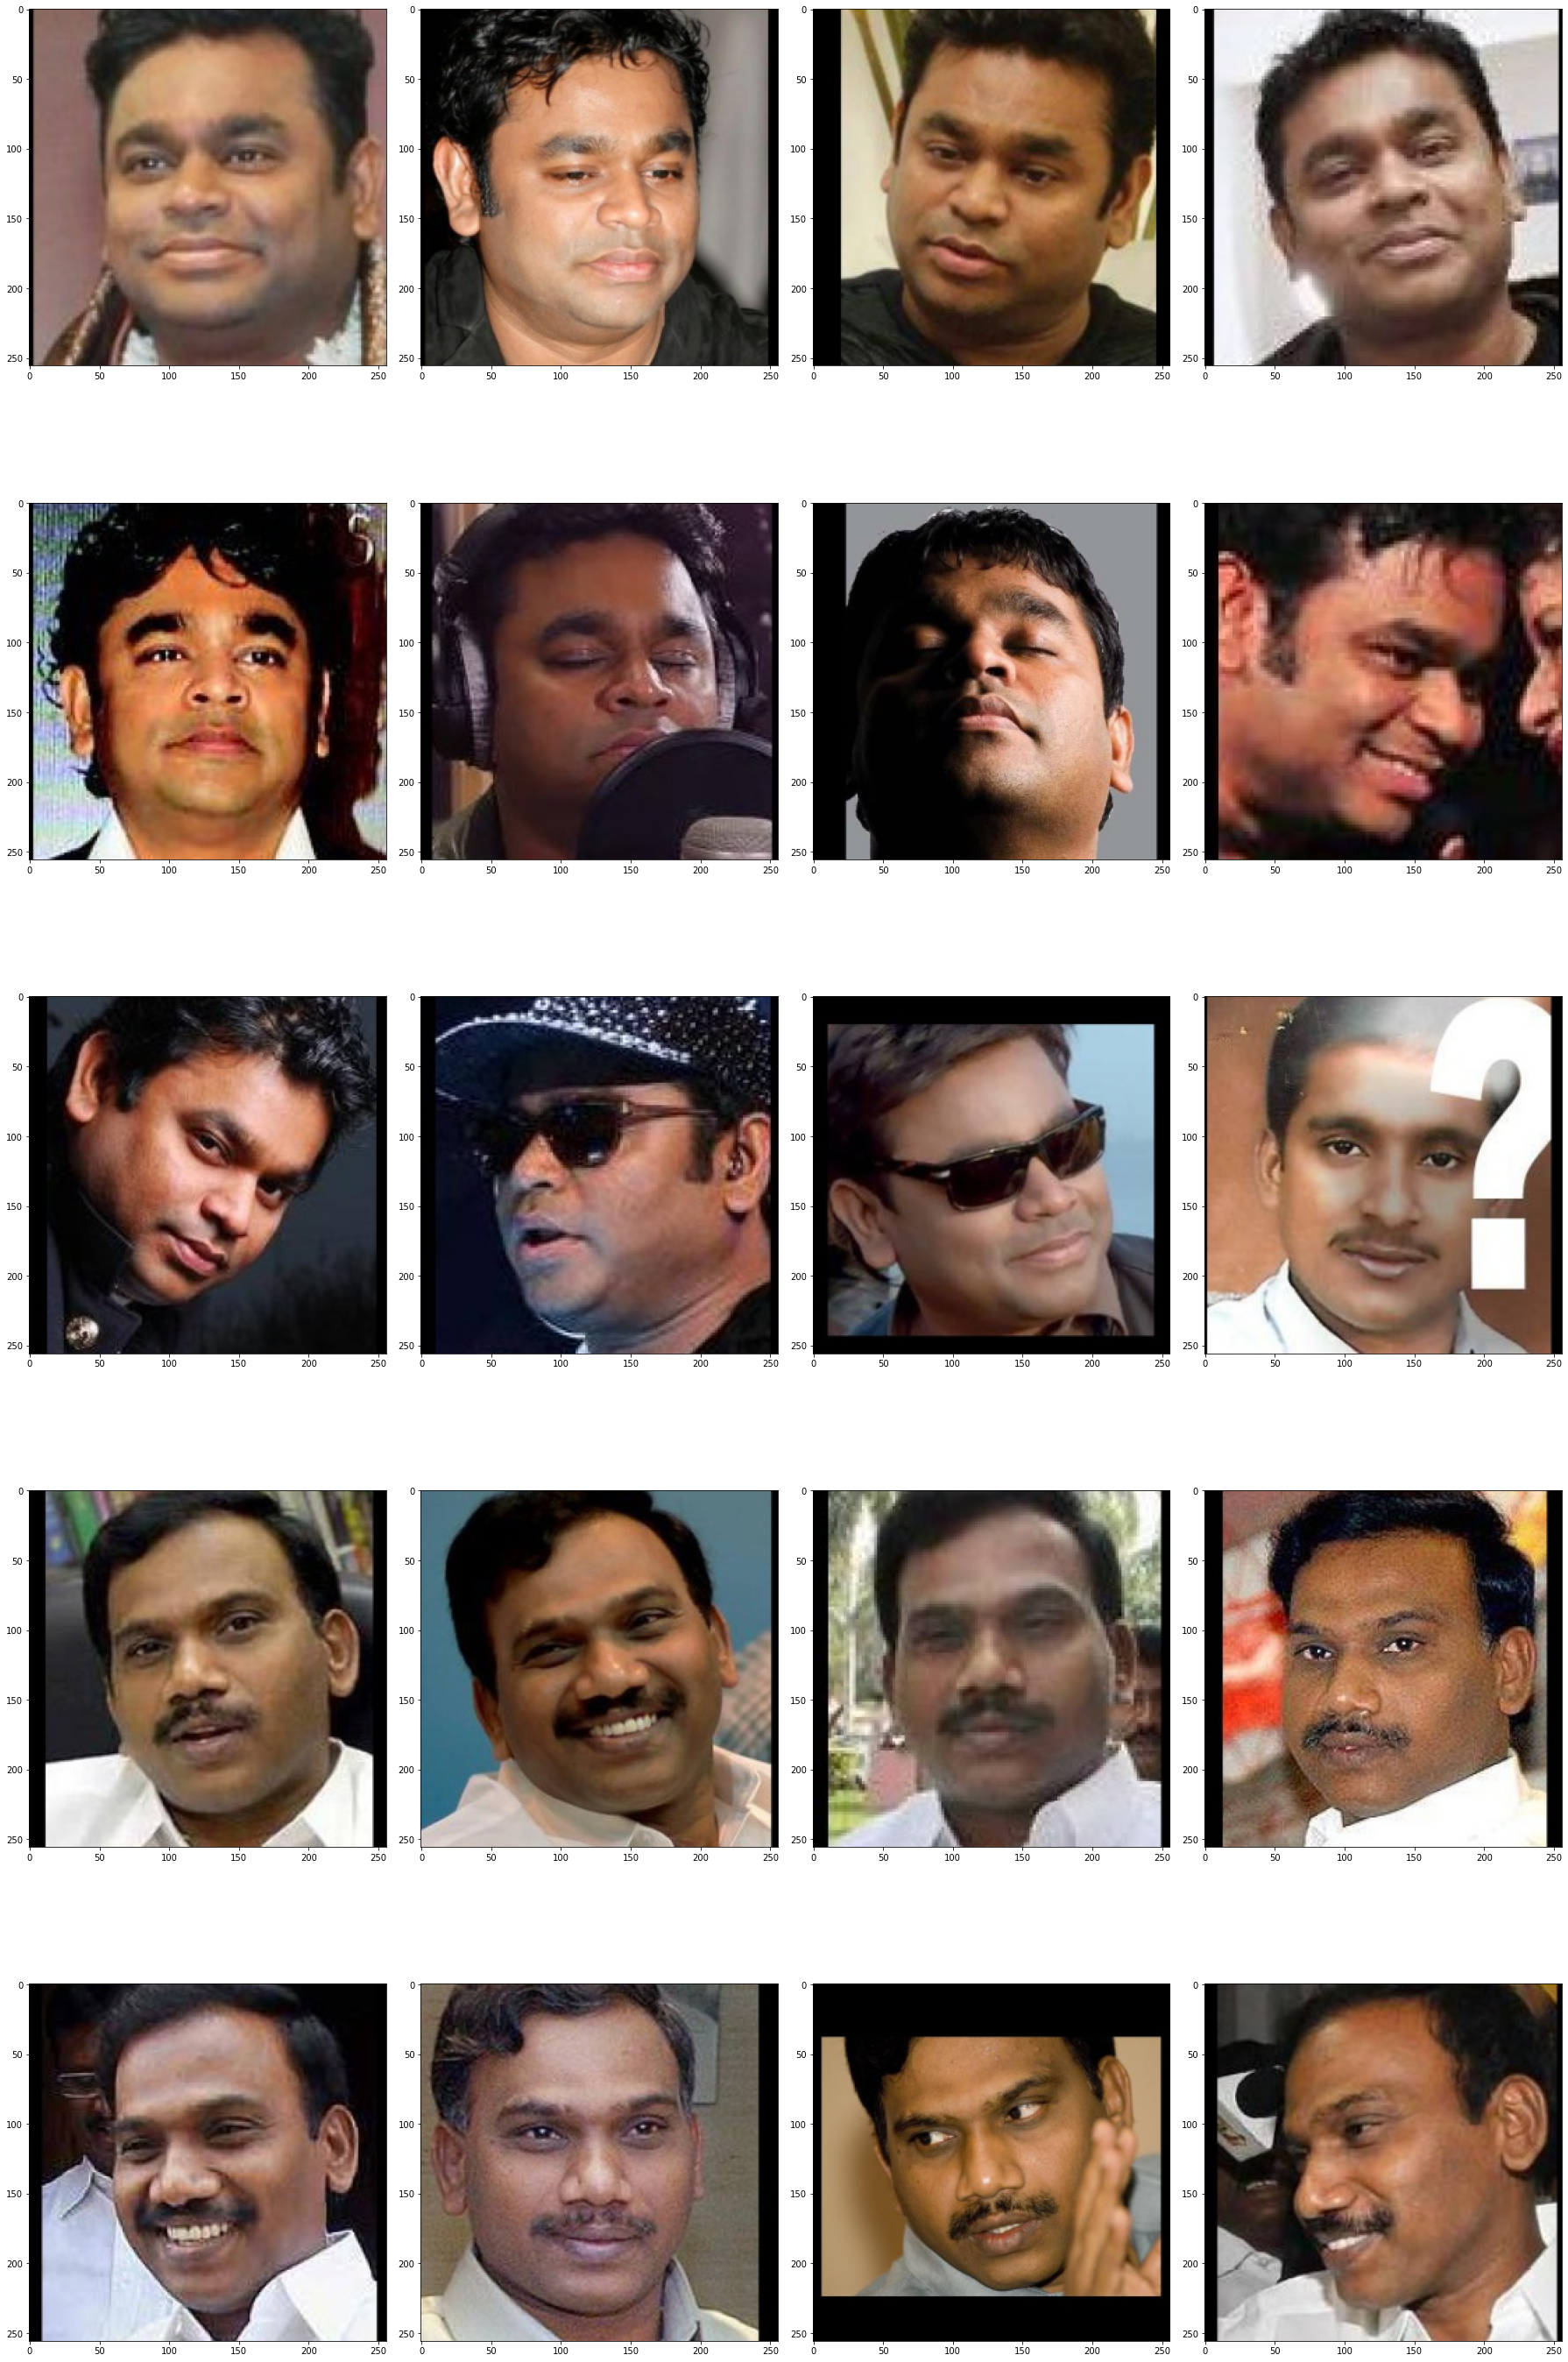

In [339]:
NUM_COLS = 4
NUM_ROWS = 5
plt.figure(figsize=(25, NUM_ROWS * 8))

n = 2

for i in range(20 * n, 20 * (n + 1)):
    sample = train_dataset.__getitem__(i)
    plt.subplot(NUM_ROWS, NUM_COLS, i % 20 + 1)
    plt.imshow(sample['image'])

plt.tight_layout()
plt.show()

In [ ]:
# Поворот разметки с использованием библиотеки Albumentation
transform = A.Compose(
    [
        A.Rotate(always_apply=False, p=1.0, limit=(-50, 50), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
    ], 
    keypoint_params=A.KeypointParams(format='xy')
)

image_transformed = transform(image=sample['image'], keypoints=sample['landmarks'].reshape(-1, 2).numpy())
image = image_with_landmarks(image_transformed['image'], np.array(image_transformed['keypoints']))
_ = plt.imshow(image)

In [ ]:
# Реализация собственной функции для поворота изображения

In [175]:
w = 255
h = 255
angle = 25
cv2.getRotationMatrix2D(center=(w // 2, h // 2), angle=angle, scale=1)

array([[  0.90630779,   0.42261826, -41.77360819],
       [ -0.42261826,   0.90630779,  65.57143029]])

In [179]:
# текущая реализация поворота - раздувает размеры границ
def rotate_bound(image, angle):
    
    # grab the dimensions of the image and then determine the center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    
    # grab the rotation matrix (applying the negative of the angle to rotate clockwise)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

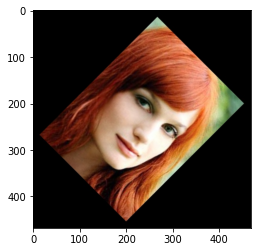

In [182]:
_ = plt.imshow(rotate_bound(image, 45))

In [ ]:
# Оценка влияния трансформация на изображения

In [348]:
train_source = transforms.Compose([
        ScaleMinSideToSize((256, 256)),
        CropCenter(256)
])
train_dateset_source = ThousandLandmarksDataset('data/train', train_source, split="train", data_size=1000, train_share=1)

load landmarks...: 100%|██████████| 1000/1000 [00:00<00:00, 2682.45it/s]


In [387]:
train_transforms = transforms.Compose([
        ScaleMinSideToSize((256, 256)),
        CropCenter(256),
        
        # пиксельные трансформации
#         TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), brightness_by_max=True), ("image",)),
#         TransformByKeysA(A.RandomGamma(always_apply=False, p=0.2, gamma_limit=(30, 140), eps=1e-07), ("image",)),
#         TransformByKeysA(A.ToGray(always_apply=False, p=0.05), ("image",)),

#         # шумы
#         TransformByKeysA(A.Blur(always_apply=False, p=1, blur_limit=(3, 5)), ("image",)), # скорее всего эта штука не нужна
#         TransformByKeysA(A.GaussNoise(always_apply=False, p=1, var_limit=(50.0, 70.0)), ("image",)), # скорее всего эта штука нужна - эффект изображения с низким разрешением!

#         # перекрытия
#        TransformByKeysA(A.CoarseDropout(always_apply=False, p=1, max_holes=1, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)), 
        
#         TransformByKeys(transforms.ToPILImage(), ("image",)),
#         TransformByKeys(transforms.ToTensor(), ("image",)),
#         TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
    ]) 
train_dataset_transformed = ThousandLandmarksDataset('data/train', train_transforms, split="train", data_size=1000, train_share=1)

load landmarks...: 100%|██████████| 1000/1000 [00:00<00:00, 2691.98it/s]


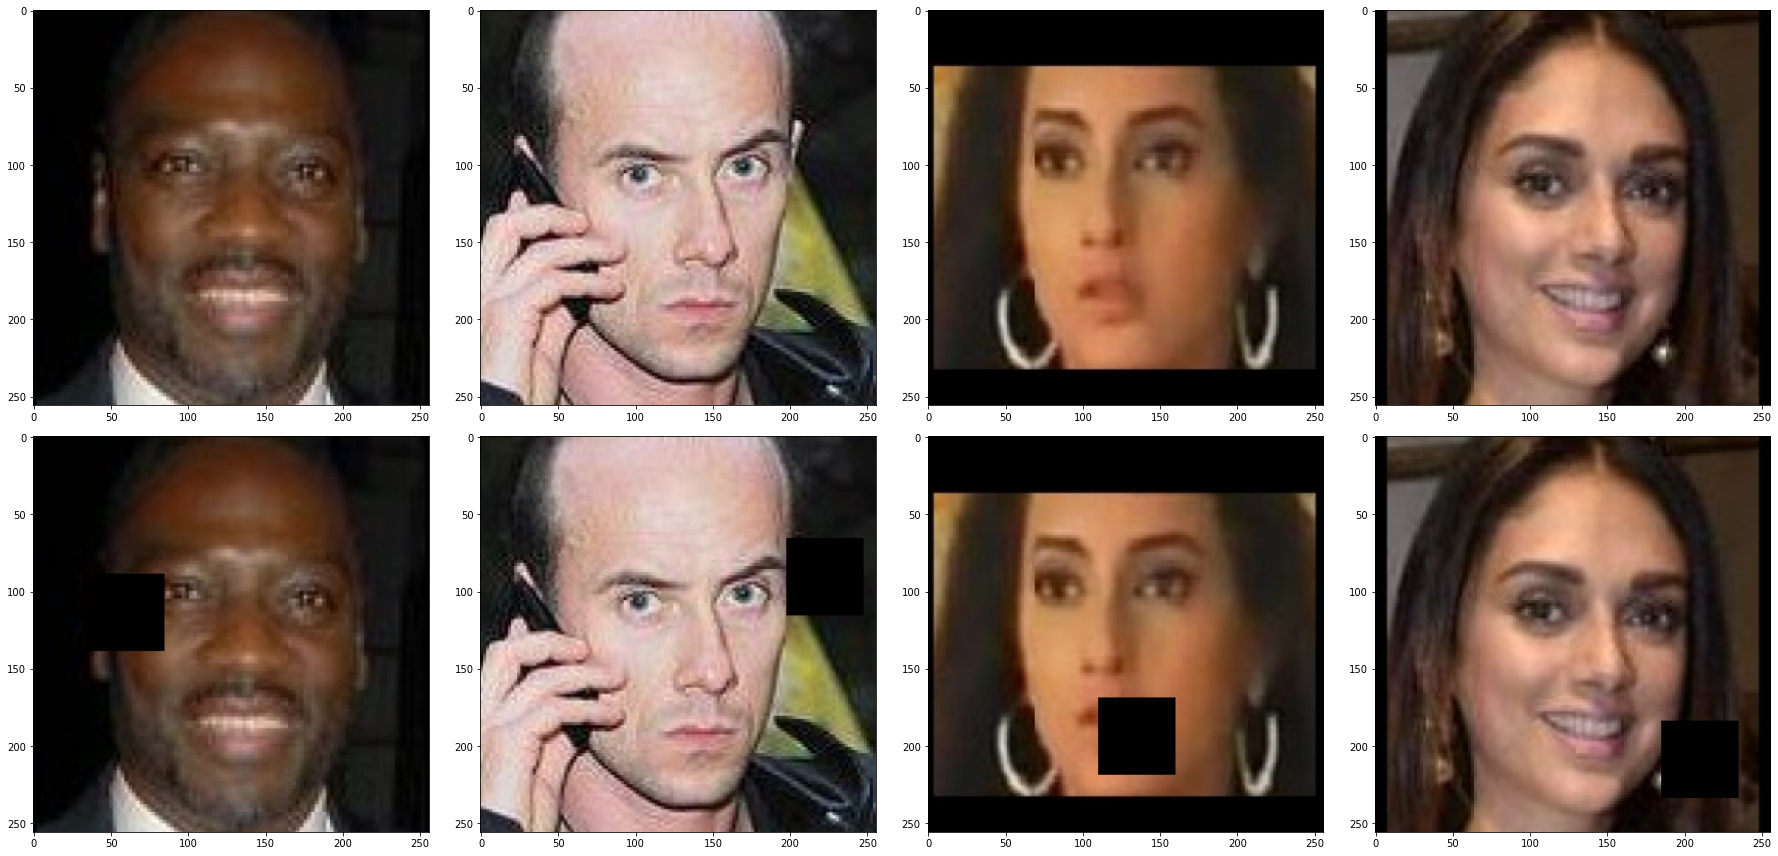

In [388]:
NUM_COLS = 4
NUM_ROWS = 2
plt.figure(figsize=(25, NUM_ROWS * 6))

random_idxs = np.random.choice(1000, size=4, replace=False)

for i, idx in enumerate(random_idxs):
    sample_source = train_dateset_source.__getitem__(idx)
    plt.subplot(NUM_ROWS, NUM_COLS, i + 1)
    plt.imshow(sample_source['image'])
    
    
    sample_transformed = train_dataset_transformed.__getitem__(idx)
    plt.subplot(NUM_ROWS, NUM_COLS, NUM_COLS + i + 1)
    plt.imshow(sample_transformed['image'])

plt.tight_layout()
plt.show()

In [ ]:
# Черновик
train_transforms = transforms.Compose([
    ScaleMinSideToSize((args.crop_size, args.crop_size)),
    CropCenter(args.crop_size),

    # пиксельные трансформации
    TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), ("image",)),
    TransformByKeysA(A.RandomGamma(always_apply=False, p=0.2, gamma_limit=(30, 140), eps=1e-07), ("image",)),
    TransformByKeysA(A.ToGray(always_apply=False, p=0.1), ("image",)),

    # шумы
    TransformByKeysA(A.Blur(always_apply=False, p=0.2, blur_limit=(3, 7)), ("image",)),
    TransformByKeysA(A.GaussNoise(always_apply=False, p=0.2, var_limit=(10.0, 50.0)), ("image",)),

    # перекрытия
    TransformByKeysA(A.CoarseDropout(always_apply=False, p=0.3, max_holes=2, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)), 

    TransformByKeys(transforms.ToPILImage(), ("image",)),
    TransformByKeys(transforms.ToTensor(), ("image",)),
    TransformByKeys(transforms.Normalize(mean=[0.485, 0.0456, 0.406], std=[0.229, 0.224, 0.225]), ("image",)),
])  

In [ ]:
# augmentation_lst = [
#     ('RandomBrightnessContrast', TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), brightness_by_max=True), ("image",))),
#     ('RandomGamma', TransformByKeysA(A.RandomGamma(always_apply=False, p=0.5, gamma_limit=(30, 140), eps=1e-07), ("image",)),),
#     ('ToGray', TransformByKeysA(A.ToGray(always_apply=False, p=0.5), ("image",))),
#     ('Blur', TransformByKeysA(A.Blur(always_apply=False, p=0.5, blur_limit=(3, 7)), ("image",))),
#     ('GaussNoise', TransformByKeysA(A.GaussNoise(always_apply=False, p=0.5, var_limit=(50.0, 70.0)), ("image",))),
#     ('CoarseDropout', TransformByKeysA(A.CoarseDropout(always_apply=False, p=0.5, max_holes=1, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)))
# ]